<a id='toc'></a>

### Conteudos
* [0. Contexto](#business)<br>
* [1. Importação Dados](#import) <br>
    * [1.1. Bibliotecas](#lib)<br>
    * [1.2. Importação e integração dos dados](#integrate)<br>
    * [1.2. Importação e integração dos dados](#integrate)<br>
    * [1.3. Merge Data](#index)<br>
    * [1.4. Verificar Duplicados](#duplicates)<br>
* [3. Exploração de dados](#preprocess) <br>
    * [2.1. Exploração Básica](#basic)<br>
    * [2.2. Tratamento dos Missing Values](#stats)<br>
    * [2.3. Padronização colunas categóricas](#stats_num)<br>
    * [2.3. Geração de Atributos](#visual)<br>
        * [2.3.1. Age ](#visual_num)<br>
        * [2.3.2. Membership_years ](#visual_cat)<br>
        * [2.3.3. Dependents ](#visual_cat)<br>
        * [2.3.4. Total_Spent ](#visual_cat)<br>
        * [2.3.5. TotalPurchases + AvgSpentPerPurchase ](#visual_cat)<br>
        * [2.3.6. Martinal_Status ](#visual_cat)<br>
    * [2.4. Identificaçao / Tratamento Outliers](#visual)<br>
* [3. Análise visual dos dados](#preprocess) <br>
    * [3.1. Variavies numéricas](#lib)<br>
    * [3.2. Variavies categóricas](#lib)<br>
* [4. Segmentação](#preprocess) <br>
    * [4.1. Transformação dos dados c/ StandardScaler](#lib)<br>
    * [4.2. Modelagem c/ K-Means](#lib)<br>
        * [4.2.1. Método Elbow ](#visual_num)<br>
        * [4.2.2. Silhouette Score ](#visual_num)<br>
        * [4.2.3.  Método de Ward ](#visual_num)<br>
        * [4.2.4. K-MEANS - K=2 ](#visual_num)<br>
        * [4.2.5. K-MEANS - K=3 ](#visual_num)<br>
        * [4.2.6. Euclidean_distance para K = 3 ](#visual_num)<br>
    * [4.3. Análise detalhada do cluster escolhido](#lib)<br>
        * [4.3.1. Mapeamento ](#visual_num)<br>
        * [4.3.2. Centroids Análises ](#visual_num)<br>
        * [4.3.3. Análise variáveis demográficas ](#visual_num)<br>
* [5. Plano de Marketing](#import) <br>
    * [5.1. Exploração variaveis](#lib)<br>
    * [5.1. Exploração variaveis](#lib)<br>
      
    
            
  

<div style="background-color:#a8f0d7; padding: 10px; border-radius: 20px; text-align: center;">
  <strong>0. Contexto</strong>
</div>


O restaurante EDIT. Gastronomic oferece um menu diversificado que atende a várias preferências alimentares (carne, peixe e vegetariano), acompanhado por uma seleção refinada de bebidas artesanais e um atendimento personalizado. Através de um cartão de cliente, a empresa tem recolhido dados em troca de promoções e descontos. Agora, a equipa foi contratada para analisar esses dados e segmentar os clientes, com o objetivo de tornar futuras campanhas mais eficazes e direcionadas, aumentando a taxa de conversão e o sucesso das ações de marketing.

# 📁 Dataset Dictionary

---

### 📘 **Demográficos.xlsx**

**Atributos:**

- `CustomerID`: Identificação única do cliente  
- `Name`: Nome do cliente  
- `Birthyear`: Ano de nascimento do cliente  
- `Education`: Nível de escolaridade do cliente  
- `Marital_Status`: Estado civil do cliente  
- `Income`: Rendimento anual do agregado familiar do cliente  
- `Kid_Younger6`: No. de crianças com mens de 6 anos no agregado familiar  
- `Children_6to18`: No. de crianças entre os 6 e 18 anos no agregado familiar  

---

### 🗃️ **Firmográficos.csv**

**Atributos:**

- `CustomerID`: Identificação única do cliente  
- `Date_Adherence`: Data de adesão do cliente ao cartão da empresa  
- `Recency`: Número de dias desde a última compra do cliente  
- `MntMeat&Fish`: Montante gasto em pratos de carne e peixe  
- `MntEntries`: Montante gasto em entradas  
- `MntVegan&Vegetarian`: Montante gasto em pratos veganos e vegetarianos  
- `MntDrinks`: Montante gasto em bebidas  
- `MntDesserts`: Montante gasto em sobremesas 
- `MntAdditionalRequests`: Montante gasto em pedidos adicionais  
- `NumOfferPurchases`: Número de compras efectuadas com ofertas promocionais  
- `NumAppPurchases`: Número de compras efectuadas através de aplicações de entrega de comida  
- `NumTakeAwayPurchases`: Número de compras de take-away 
- `NumInStorePurchases`: Número de compras na loja
- `NumAppVisitsMonth`: Número médio de acessos ao restaurante em aplicações de entrega de comida 
- `NumInStorePurchases`: Flag que indica se o cliente efectuou uma reclamação

<div style="background-color:#a8f0d7; padding: 12px; border-radius: 30px; text-align: center;">
  <strong>1. Importação de dados</strong>
</div>


###  1.1. Bibliotecas

---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


###  1.2. Importação e integração dos dados

---

In [8]:
crm = pd.read_csv(r"C:\Users\nuno_\Documents\PEN\RL DSBA\AULAS\Modulo 7 - ML Models\Trabalho final\Guidelines Clustering Projeto Final\data\crm.csv", index_col=0)
sales = pd.read_excel(r"C:\Users\nuno_\Documents\PEN\RL DSBA\AULAS\Modulo 7 - ML Models\Trabalho final\Guidelines Clustering Projeto Final\data\sales.xlsx", index_col=0)

###  1.3. Merge data

---

In [11]:
df = pd.merge(crm, sales, on='CustomerID')
df = df.copy()


###  1.4. Verificar duplicados

---

In [15]:
df[df.duplicated()]
df.drop_duplicates(inplace = True)

Identificamos 8 colunas duplicadas do df

<div style="background-color:#a8f0d7; padding: 10px; border-radius: 20px; text-align: center;">
  <strong>2. Exploração dos dados</strong>
</div>


###  2.1. Exploração Básica

---

In [20]:
pd.set_option('display.max_columns', None)
df.head(5)

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,,,,,,,,,,,,,,,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0,2021-01-09 00:00:00,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0
19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0,2021-04-10 00:00:00,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0
29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0,2022-01-12 00:00:00,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0
12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1,2021-10-12 00:00:00,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0
21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0,2020-12-11 00:00:00,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 14594 to 15581
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                6977 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              6972 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15  NumO

In [24]:
df.describe()

,Birthyear,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
count,7000.000000,7000.000000,7000.000000,7000.000000,6977.000000,7000.000000,7000.000000,7000.000000,6972.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1976.451429,77988.962407,0.440571,0.490571,49.235058,3079.523800,534.749429,2785.050786,545.657544,540.656029,42.556186,2.448429,6.015714,3.834571,5.790571,5.278286,0.010286
std,11.996270,35409.810253,0.543477,0.542174,28.922688,3370.377166,787.846684,3908.718244,805.149088,802.221866,49.650747,2.306968,2.745537,3.331142,3.295708,2.748596,0.100903
min,1948.000000,2493.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,51586.250000,0.000000,0.000000,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.000000
50%,1977.000000,77190.000000,0.000000,0.000000,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,5.000000,5.000000,0.000000
75%,1985.000000,102016.250000,1.000000,1.000000,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,8.000000,7.000000,0.000000
max,2005.000000,237639.725000,2.000000,2.000000,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,13.000000,20.000000,1.000000


In [26]:
def missing_value(dataset):
  
  total = dataset.isnull().sum().sort_values(ascending=False)
  percent = dataset.isnull().sum()/dataset.isnull().count().sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
  missing_data[missing_data['percent']!=0]
  return missing_data

missing_value(df)

,total,percent
MntDrinks,28,0.004000
Recency,23,0.003286
Education,14,0.002000
Name,0,0.000000
NumAppVisitsMonth,0,0.000000
NumStorePurchases,0,0.000000
NumTakeAwayPurchases,0,0.000000
NumAppPurchases,0,0.000000
NumOfferPurchases,0,0.000000
MntAdditionalRequests,0,0.000000


Missing Values nas colunas 'MntDrinks', 'Recency', 'Education'.
A percentagem é muito reduzida, optaremos por tratar os Missing Values

In [29]:
df.describe(include='object')

,Name,Education,Marital_Status,Date_Adherence
count,7000,6986,7000,7000
unique,6241,9,10,701
top,Mr. Stewart Grant,Graduation,Married,2020-09-19 00:00:00
freq,3,3497,2830,23


### 2.2. Tratamento dos Missing Values

---

In [32]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Education'].value_counts()

Education
Graduation    3511
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: count, dtype: int64

Education - Categórica - tratamento dos Missing Values pela moda


In [35]:

df['MntDrinks'] = df['MntDrinks'].fillna(df['MntDrinks'].median())
df['MntDrinks'].value_counts()

MntDrinks
0.0      1177
20.0      449
40.0      367
60.0      345
80.0      244
         ... 
98.0        1
494.0       1
332.0       1
148.0       1
666.0       1
Name: count, Length: 370, dtype: int64

MntDrinks - Numérica -  tratamento missing values pela mediana 

In [38]:
df['Recency'].unique()

array([43., 74., 85., 25., 64.,  6., 12., 83., 53., 56., 66., 92., 13.,
       71., 50., 46.,  5., 20., 73., 82., 77., 29., 24., 55., 11., 78.,
       93., 26., 59., 97., 49.,  7.,  9., 21.,  4., 86., 17., 72., 70.,
       87., 23.,  0., 16., 79., 38., 54., 75., 19., 81., 10., 96., 52.,
       18., 90., 95., 84., 80., 51., 91., 28., 69., 60., 33.,  3., 30.,
       37., 39., 57., 63., 22., 89., 68., 31., 99.,  1., 67., 61., 36.,
       42., 94., 27., 41., 44., 34., 76.,  2.,  8., 88., 98., 48., 62.,
       47., 35., 32., nan, 65., 15., 45., 14., 40., 58.])

Relativamente à coluna Recency, iremos tratar inicialmente a coluna "Date_Adherence" que está como tipo object, e que poderá influenciar diretamente os valores da coluna "Recency". Verificamos a existência de um erro na linha 1271 - Date_Adherence  = 2/29/2022. 2022 é um ano não bissexto, efetuamos a alteração para 3-1-2022

In [41]:
print(df.iloc[1271]) 

Name                     Mrs. Molly Peake
Birthyear                            1990
Education                      Graduation
Marital_Status                    Married
Income                            37710.0
Kid_Younger6                            1
Children_6to18                          0
Date_Adherence                  2/29/2022
Recency                              17.0
MntMeat&Fish                        180.0
MntEntries                              0
MntVegan&Vegetarian                 300.0
MntDrinks                             0.0
MntDesserts                          80.0
MntAdditionalRequests                29.0
NumOfferPurchases                       2
NumAppPurchases                         5
NumTakeAwayPurchases                    2
NumStorePurchases                       2
NumAppVisitsMonth                       8
Complain                                0
Name: 27746, dtype: object


In [43]:
df.loc[df['Date_Adherence'] == '2/29/2022', 'Date_Adherence'] = '3/1/2022'

In [45]:
df['Date_Adherence'] = pd.to_datetime(df['Date_Adherence'])


Date_Adherence object to Datetime

In [48]:
df['Recency'] = df['Recency'].fillna(df['Recency'].mean())

Recency - Numérica -  tratamento missing values pela média. 

### 2.2. Padronização colunas categóricas

---

In [52]:
print(f" Education: {df['Education'].unique()}\n")
print(f" Marital_Status: {df['Marital_Status'].unique()}")

 Education: ['Graduation' 'PhD' 'HighSchool' 'Master' 'Basic' 'master' 'graduation'
 'phd' 'highschool']

 Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'married' 'Widow' 'together'
 'divorced' 'single' 'widow']


In [54]:
df['Education'] = df['Education'].str.lower()
df['Marital_Status'] = df['Marital_Status'].str.lower()


Convertemos os valores da coluna 'Education' e 'Marital_Status' para minúsculas (lower())

### 2.3. Geração de Atributos

---

#### 2.3.1. Age 



In [59]:
df['Age'] = 2025 - df['Birthyear']
df.drop(columns=['Birthyear'], inplace=True)


Age – Variável derivada da data de nascimento (Year_Birth). Efetuamos o drop da coluna 'Birthyear'

#### 2.3.2. Membership_years 

In [63]:
df['Membership_years'] = 2025 - df['Date_Adherence'].dt.year
df.drop(columns=['Date_Adherence'], inplace=True)

Membership_years – Variável derivada da data de data de adesão (Date_Adherence), em anos. Identifica o numero de anos de membro do CustomerID Efetuamos o drop da coluna 'Date_Adherence'.

#### 2.3.3. Dependents 


In [67]:
df["Dependents"]= df["Kid_Younger6"] + df["Children_6to18"]

Dependents – Atributo calculado pela soma de Kid_Younger6 e Children_6to18. 

#### 2.3.4. Total_spent

In [71]:
df["Total_spent"]= df["MntMeat&Fish"] + df["MntEntries"]+df["MntVegan&Vegetarian"] + df["MntDrinks"]+df["MntDesserts"] + df["MntAdditionalRequests"]



Total_spent - 	Variável derivada: valor total gasto pelo cliente em refeições, calculado pela soma de MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts e MntAdditionalRequests

#### 2.3.5. TotalPurchases + AvgSpentPerPurchase

In [75]:
df['TotalPurchases'] = (
    df['NumOfferPurchases'] +
    df['NumAppPurchases'] +
    df['NumTakeAwayPurchases'] +
    df['NumStorePurchases']
)

df['AvgSpentPerPurchase'] = df.apply(
    lambda row: row['Total_spent'] / row['TotalPurchases'] if row['TotalPurchases'] > 0 else 0,
    axis=1
)

TotalPurchases	Variável derivada: total de compras realizadas pelo cliente, obtido pela soma de NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases e NumStorePurchases

AvgSpentPerPurchase	Variável calculada: gasto médio por compra, calculado como Total_spent dividido por TotalPurchases (com tratamento para evitar divisão por zero)

#### 2.3.6. Reclassificação - 'Martinal_Status'

---

In [79]:
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')
df['Marital_Status'].value_counts()

Marital_Status
married     2866
together    1706
single      1538
divorced     645
widow        245
Name: count, dtype: int64

### 2.4. Identificação e Tratamento de Outliers

---

In [82]:
df.skew(numeric_only=True)

Income                    0.844721
Kid_Younger6              0.693587
Children_6to18            0.451693
Recency                   0.017705
MntMeat&Fish              1.148862
MntEntries                2.087220
MntVegan&Vegetarian       2.486897
MntDrinks                 2.052959
MntDesserts               2.057811
MntAdditionalRequests     1.826522
NumOfferPurchases         2.860514
NumAppPurchases           0.525873
NumTakeAwayPurchases      2.254158
NumStorePurchases         0.623254
NumAppVisitsMonth         1.005192
Complain                  9.709429
Age                       0.092478
Membership_years          0.051952
Dependents                0.468639
Total_spent               0.930521
TotalPurchases            0.201741
AvgSpentPerPurchase      22.901888
dtype: float64

O método .skew() calcula a assimetria de cada coluna numérica de um DataFrame. A assimetria mede o grau de distorção de uma distribuição em relação à simetria perfeita (aquela que seria uma curva normal).

Skew ≈ 0: Distribuição aproximadamente simétrica.

Skew > 0: Distribuição com cauda à direita (mais valores baixos, poucos muito altos)

Skew < 0: Distribuição com cauda à esquerda (mais valores altos, poucos muito baixos)

- __Alta assimetria positiva (fortemente enviesados à direita):__

AvgSpentPerPurchase: 22.90 → Muito distorcido! A maioria gasta pouco, mas alguns gastam muito.

Complain: 9.70 → Extremamente enviesado, provavelmente porque temos poucas reclamações.

NumOfferPurchases: 2.86

MntVegan&Vegetarian: 2.49

NumTakeAwayPurchases: 2.25

- __Assimetria moderada:__

MntMeat&Fish: 1.15

MntAdditionalRequests: 1.83

MntDesserts: 2.05

NumAppVisitsMonth: 1.00

Income: 0.84

- __Assimetria baixa ou nula (distribuição mais "normal"):__

Recency: 0.017

Age: 0.092

Membership_years: 0.051

TotalPurchases: 0.201

Children_6to18: 0.45

__`Income` - Análise gráfica__

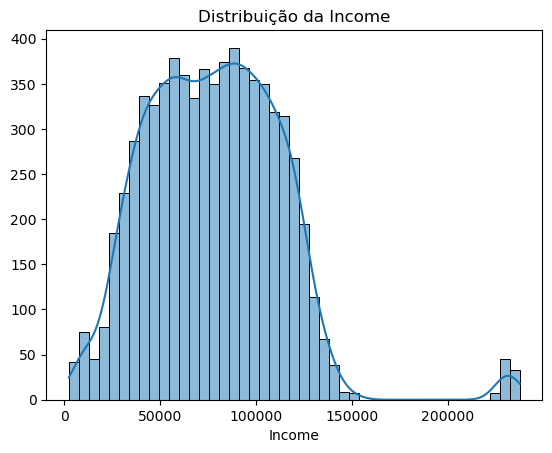

In [86]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribuição da Income')
plt.xlabel('Income')
plt.ylabel('')
plt.show()

__`Remoção dos valores acima do quantil 0.98`__

In [89]:

limite_superior = df['Income'].quantile(0.98)
df = df[df['Income'] <= limite_superior].copy()


__`NumOfferPurchases, MntVegan&Vegetarian, NumTakeAwayPurchases`__

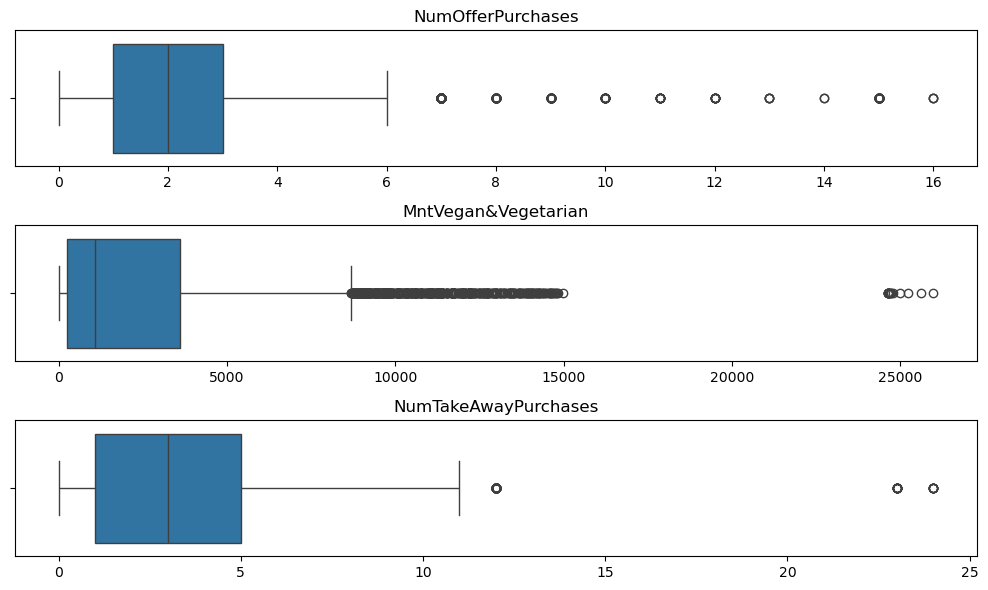

In [92]:
# conjunto de boxplot para identificar outliers 
plt.figure(figsize=(10, 6))

######################## Boxplot 1 - NumOfferPurchases #################################
plt.subplot(3, 1, 1)
sns.boxplot(data=df, x='NumOfferPurchases', orient='h')
plt.title('NumOfferPurchases')
plt.xlabel('')
######################## Boxplot 2 - MntVegan&Vegetarian #################################
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x='MntVegan&Vegetarian', orient='h')
plt.title('MntVegan&Vegetarian')
plt.xlabel('')
######################## Boxplot 3 - NumTakeAwayPurchases #################################
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x='NumTakeAwayPurchases', orient='h')
plt.title('NumTakeAwayPurchases')
plt.xlabel('')

plt.tight_layout()
plt.show()

__`Tratamento outliers colunas ['NumTakeAwayPurchases', 'NumOfferPurchases']`__

In [95]:
limites_superiores = df[['NumTakeAwayPurchases', 'NumOfferPurchases']].quantile(0.97)

df = df[
    (df['NumTakeAwayPurchases'] <= limites_superiores['NumTakeAwayPurchases']) &
    (df['NumOfferPurchases'] <= limites_superiores['NumOfferPurchases'])
].copy()

<div style="background-color:#a8f0d7; padding: 10px; border-radius: 20px; text-align: center;">
  <strong>3. Análise Gráfica</strong>
</div>


### 3.1. Variavies numéricas

---

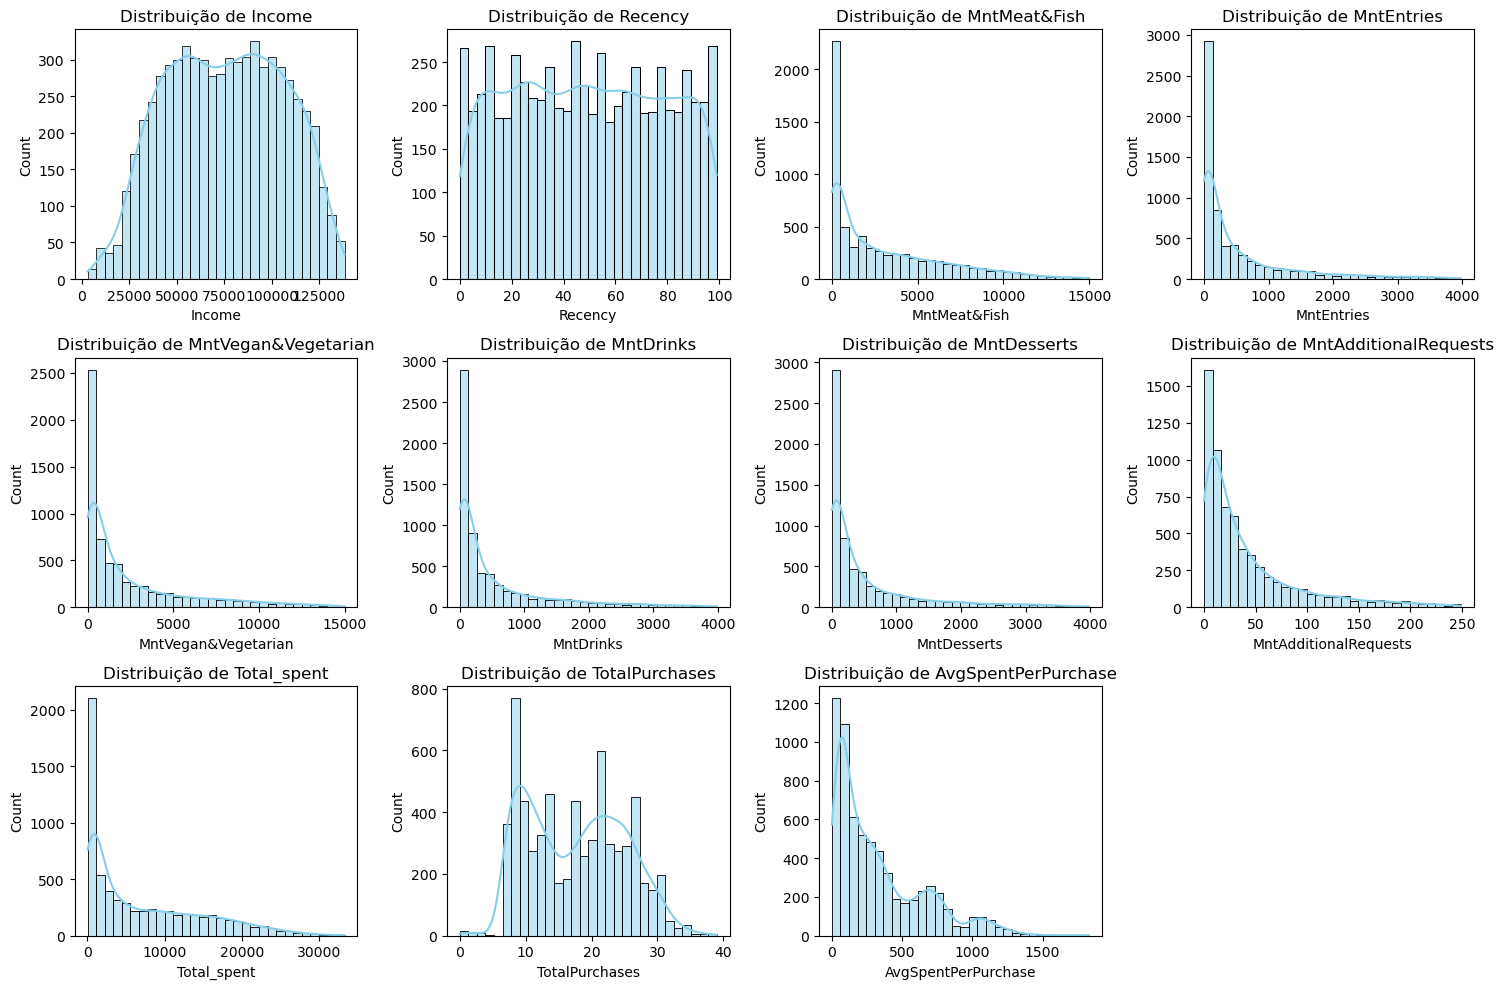

In [99]:
num_cols = ['Income', 'Recency', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian',
            'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'Total_spent', 
            'TotalPurchases', 'AvgSpentPerPurchase']

# Plotando histogramas para cada variável numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribuição de {col}')
    plt.tight_layout()

plt.show()

__`Análise da distribuição das váriaveis numéricas`__

__Aproximadamente Normais:__ Distribuição de Income, Distribuição de Recency

__Assimétricas (Desvio Positivo):__ Distribuição de MntMeat&Fish, Distribuição de MntEntries, Distribuição de MntVegan&Vegetarian, Distribuição de MntDrinks, Distribuição de MntDesserts, Distribuição de MntAdditionalRequests, Distribuição de Total_spent, Distribuição de AvgSpentPerPurchase.

__Multimodal:__ Distribuição de TotalPurchases

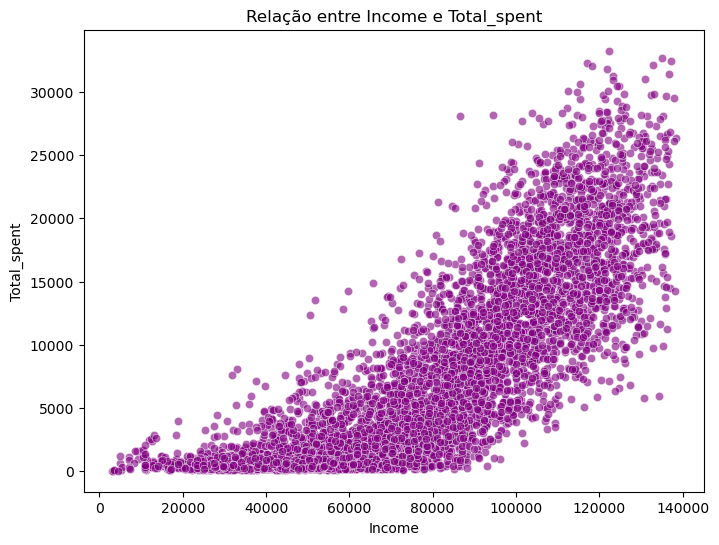

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_spent', data=df, alpha=0.6, color='purple')
plt.title('Relação entre Income e Total_spent')
plt.xlabel('Income')
plt.ylabel('Total_spent')
plt.show()

Podemos verificar que o 'Income' influencia o 'Total_spent', com uma tendência positiva geral. No Entanto a relação não é totalmente linear, ou seja, outros fatores para além do 'Income' afetam as decisões no 'Total_spent'.

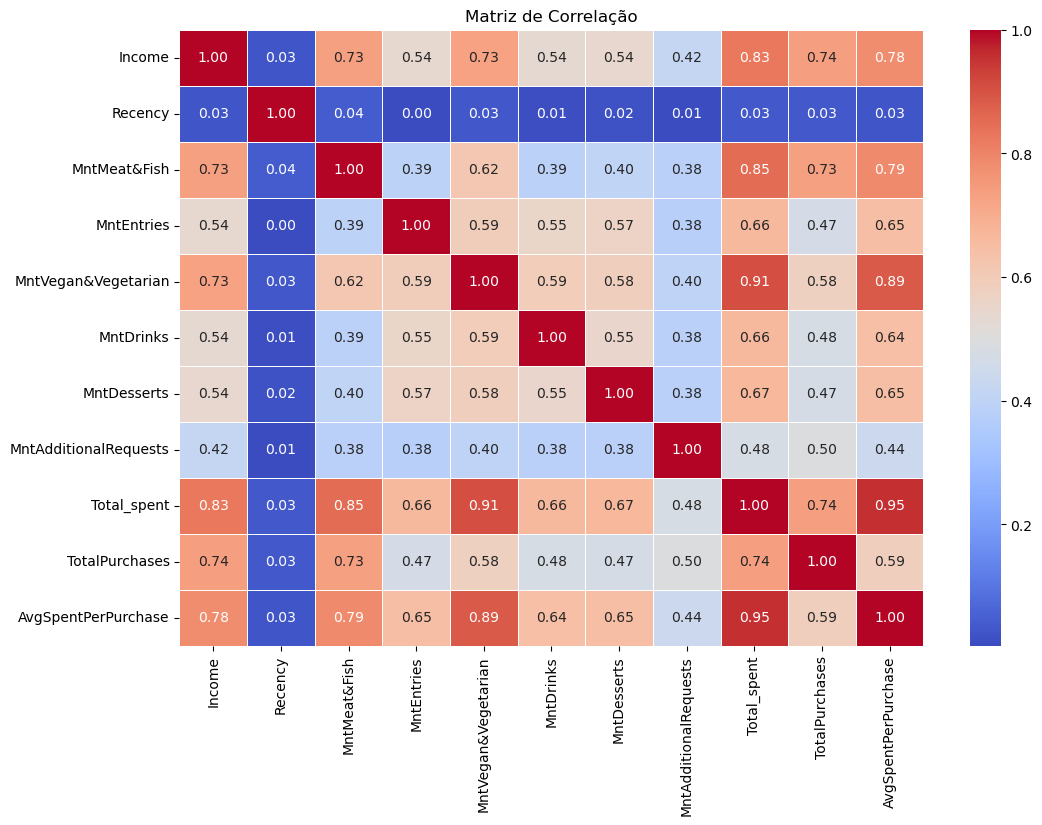

In [103]:
corr = df[num_cols].corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

__Forte Correlação Positiva com Total_spent__ : Income (0.81) , MntMeat&Fish (0.85), MntVegan&Vegetarian (0.91) TotalPurchases (0.74), AvgSpentPerPurchase (0.95)

__Correlação Positiva Moderada__ Income com MntVegan&Vegetarian (0.71), MntMeat&Fish (0.73) e TotalPurchases (0.74). AvgSpentPerPurchase com MntEntries (0.65), MntDrinks (0.64), MntDesserts (0.65), TotalPurchases (0.59).

__Correlação Fraca ou Negativa__ Recency (próximo de zero em relação a quase todas as outras variáveis). O tempo desde a última compra tem pouca relação linear direta com as outras variáveis.

### 3.2. Variavies categóricas

---

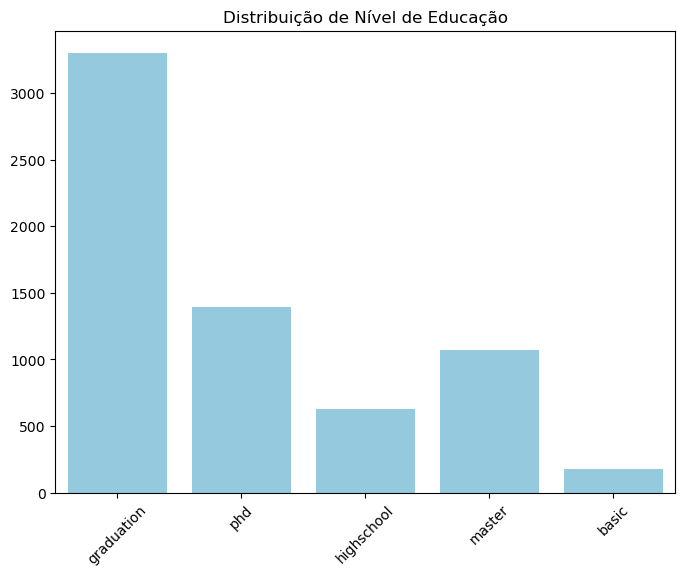

In [106]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, color='skyblue')
plt.title('Distribuição de Nível de Educação')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

Grande parte tem uma graduação. Poucos têm o ensino básico.

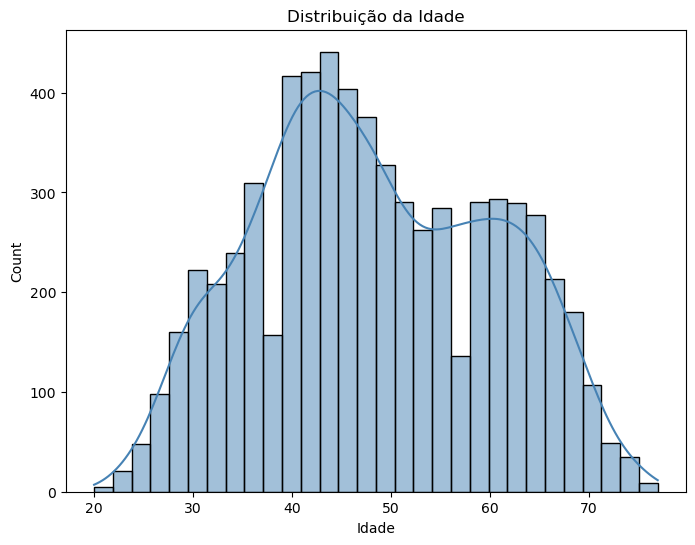

In [108]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Age', bins=30, color='steelblue', kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.show()

Em resumo, a base de clientes apresenta dois grupos etários principais: um mais jovem, com pico na faixa dos 40 anos, e outro mais velho, com pico na faixa dos 60 anos. As faixas etárias nas extremidades são menos representadas.

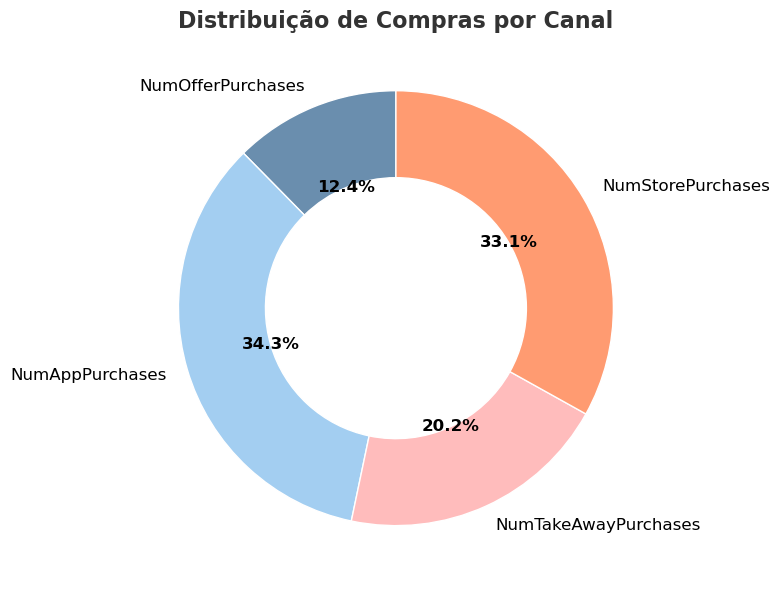

In [110]:
colunas = ["NumOfferPurchases", "NumAppPurchases", "NumTakeAwayPurchases", "NumStorePurchases"]
somas = df[colunas].sum()

colors = ["#6A8EAE", "#A3CEF1", "#FFBCBC", "#FF9B71"]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    somas,
    labels=colunas,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'color': 'black'}
)


plt.setp(autotexts, size=12, weight="bold")
ax.set(aspect="equal")
plt.title("Distribuição de Compras por Canal", fontsize=16, fontweight="bold", color="#333")
plt.tight_layout()
plt.show()

A maioria das compras é realizada através do aplicativo, seguido de perto pelas compras em loja. As compras para levar também representam uma parcela importante, enquanto as compras motivadas por ofertas são as menos frequentes em termos de volume total.

<div style="background-color:#a8f0d7; padding: 10px; border-radius: 20px; text-align: center;">
  <strong>4. Segmentação</strong>
</div>

### 4.1. Transformação dos dados c/ StandardScaler

---

In [117]:
df_encoded = df.copy()

##################################### Log-transform - Variavies Assimétricas  #######################################################

log_cols = ['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
            'MntDesserts', 'MntAdditionalRequests', 'Total_spent']
for col in log_cols:
    df_encoded[col] = np.log1p(df[col])

#####################################   converter as colunas categóricas ############################################################

df_encoded = pd.get_dummies(df_encoded, columns=['Education', 'Marital_Status'], drop_first=True)

##################################### Drop colunas que não entram no modelo ##########################################################

df_encoded = df_encoded.drop(['Complain', 'Name', 'Kid_Younger6', 'Children_6to18', 'AvgSpentPerPurchase'], axis=1)

##################################### Aplicamos o StandardScaler #####################################################################

scaler = StandardScaler()

##################################### Identificar as numéricas (escalar só numéricas #################################################

bin_cols = [col for col in df_encoded.columns if df_encoded[col].dropna().isin([0,1]).all()]
num_cols = [col for col in df_encoded.columns if col not in bin_cols]


df_num_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[num_cols]), columns=num_cols)

#################################### Juntar as binárias e converter para float #######################################################

df_scaled = pd.concat([df_num_scaled, df_encoded[bin_cols].reset_index(drop=True)], axis=1)

df_scaled = df_scaled.astype('float32')

__`Log-transform`__ em variáveis com valores altos e assimétricos (log1p).

__`MinMaxScaler`__ para normalizar variáveis numéricas entre 0 e 1.

__`One-hot enconding`__ de variáveis categóricas __*(Education, Marital_Status)*__, com drop_first=True.

Remoção de colunas irrelevantes / correlações fortes com outras variaveis: __*Complain*__  __*Name*__ __*Kid_Younger6*__ __*Children_6to18*__ e __*AvgSpentPerPurchase*__ 



In [122]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   6567 non-null   float32
 1   Recency                  6567 non-null   float32
 2   MntMeat&Fish             6567 non-null   float32
 3   MntEntries               6567 non-null   float32
 4   MntVegan&Vegetarian      6567 non-null   float32
 5   MntDrinks                6567 non-null   float32
 6   MntDesserts              6567 non-null   float32
 7   MntAdditionalRequests    6567 non-null   float32
 8   NumOfferPurchases        6567 non-null   float32
 9   NumAppPurchases          6567 non-null   float32
 10  NumTakeAwayPurchases     6567 non-null   float32
 11  NumStorePurchases        6567 non-null   float32
 12  NumAppVisitsMonth        6567 non-null   float32
 13  Age                      6567 non-null   float32
 14  Membership_years        

In [123]:
df_scaled.head(10)

,Income,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Age,Membership_years,Dependents,Total_spent,TotalPurchases,Education_graduation,Education_highschool,Education_master,Education_phd,Marital_Status_married,Marital_Status_single,Marital_Status_together,Marital_Status_widow
0,1.267385,-0.214281,0.799260,1.408117,1.137461,1.235718,0.681138,1.540249,-0.116849,1.506840,1.305543,0.365767,-0.518387,-0.362434,0.075037,-1.248489,1.110577,1.144804,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.278926,0.859320,1.020440,1.442570,1.316639,1.156574,0.994422,0.592242,-0.782372,-0.395613,2.063054,1.914243,-1.316475,0.221846,0.075037,-1.248489,1.278694,1.280885,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.317806,1.240276,0.738316,0.523370,1.042864,1.431083,0.523117,0.208638,-0.782372,-0.395613,0.548033,0.365767,-1.715519,1.390406,-1.374274,-1.248489,0.967862,0.056156,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.846109,-0.837663,0.664976,-1.885043,0.415788,-0.100794,0.221909,-0.315104,1.879721,0.745859,-0.209478,0.675462,-0.119343,-0.278966,0.075037,1.454273,0.390765,0.872642,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.570142,0.512997,0.877684,0.962887,1.452420,0.741809,0.681138,0.963524,-1.447896,-0.776104,1.305543,0.675462,-0.119343,0.472251,1.524347,-1.248489,1.135061,0.192237,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-0.165050,-1.287883,-0.509488,-0.380059,-0.388808,0.175731,0.058940,0.464122,-0.116849,-0.395613,-0.588233,-0.873013,-0.119343,0.722657,-1.374274,0.102892,-0.624336,-0.760329,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,-0.126039,1.171011,0.886352,1.179010,0.830272,0.800961,0.897520,1.632112,-0.116849,2.267822,0.926788,0.985157,1.077790,-0.362434,1.524347,0.102892,0.932922,1.553046,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,-1.625185,0.132042,-1.822908,0.264205,-1.837728,-0.644188,-1.881840,-1.915856,-0.782372,-1.537085,-0.966988,-0.873013,0.678746,-1.614463,1.524347,0.102892,-1.561638,-1.440734,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,-1.161304,0.235939,-0.668872,0.058527,-0.778127,0.338111,0.058940,0.358037,-0.782372,-1.156594,-0.588233,-0.563318,-0.518387,0.138377,-1.374274,-1.248489,-0.723886,-1.032491,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.768120,0.582262,0.513931,0.824507,1.651546,0.648447,1.312715,0.235571,-0.782372,-0.395613,2.820564,0.365767,-1.715519,1.724280,-1.374274,-1.248489,1.225455,0.872642,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 4.2. Modelagem c/ K-Means

---

#### 4.2.1 - Método Elbow

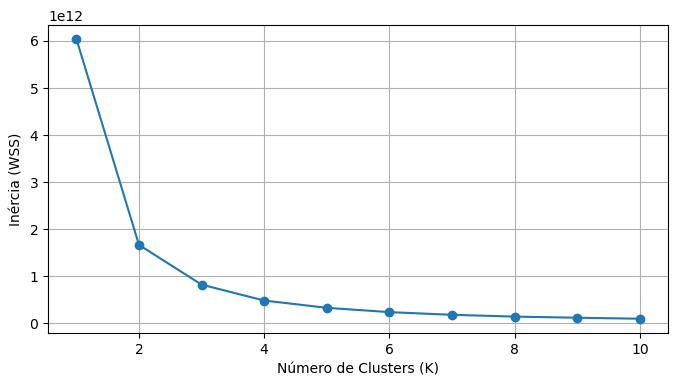

In [148]:
X = df_encoded

inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,4))
plt.plot(range(1,11), inertia, marker='o')
plt.title('')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WSS)')
plt.grid(True)
plt.show()

Observa-se uma queda acentuada na inércia (Within-Cluster Sum of Squares - WSS) até K=3. Após esse ponto, a diminuição da inércia torna-se muito mais gradual, formando uma espécie de "elbow" no gráfico. Isso sugere que adicionar mais clusters além de 3 não contribui significativamente para a redução da variância dentro dos clusters.

#### 4.2.2 - Silhouette Score

In [152]:
X = df_encoded

for k in range(2, 8):  
    kmeans = KMeans(n_clusters=k, random_state=100)
    labels = kmeans.fit_predict(X)  
    score = silhouette_score(X, labels)  
    print(f"K={k} => Silhouette Score: {score:.4f}")

K=2 => Silhouette Score: 0.6117
K=3 => Silhouette Score: 0.5615
K=4 => Silhouette Score: 0.5478
K=5 => Silhouette Score: 0.5351
K=6 => Silhouette Score: 0.5285
K=7 => Silhouette Score: 0.5257


Os Silhouette Scores indicam que K=2 tem a melhor separação entre os clusters. No entanto, o Silhouette Score para K=3 (0.665) ainda é considerado bom e não está drasticamente abaixo do valor para K=2.

#### 4.2.3 - Método de Ward

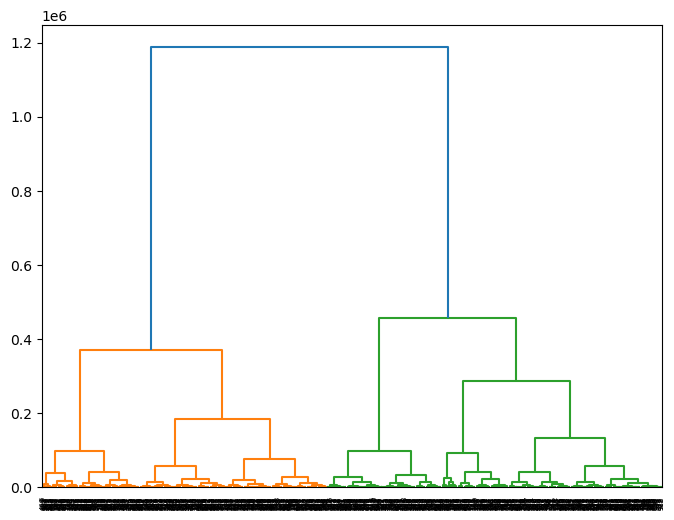

In [153]:
from scipy.cluster import hierarchy


df_encoded_sample = df_encoded.sample(n = 1000, random_state = 100)

clusters = hierarchy.linkage(df_encoded_sample, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)




#### 4.2.4 - K-MEANS - K=2

In [161]:
df_prod_k2 = df_scaled.copy()

model_k2 = KMeans(n_clusters=2, random_state=100).fit(df_prod_k2)

df_prod_k2['label'] = model_k2.labels_


In [163]:
df_prod_k2.groupby(['label']).mean().transpose()

label,0,1
Income,-0.814011,0.748576
Recency,-0.023718,0.021812
MntMeat&Fish,-0.822015,0.755936
MntEntries,-0.579712,0.533111
MntVegan&Vegetarian,-0.867674,0.797926
MntDrinks,-0.583926,0.536986
MntDesserts,-0.587134,0.539937
MntAdditionalRequests,-0.626247,0.575906
NumOfferPurchases,-0.016576,0.015244
NumAppPurchases,-0.677534,0.623070


## **Cluster 0:**
- **Income**:  -0.78) Salário geralmente mais baixo
- **Total_spent**: -0.87) Menor gasto total
- **TotalPurchases** Compram menos
- **Age**: Mais jovens
- **Dependents**: 0.43) Mais dependentes
- **NumAppPurchases**:  Apesar de visitarem mais o app, compram menos
- **Martinal_status**: não determinante no cluster

__💡 Perfil resumido:__
Consumidores de menor salário, menor gasto, baixa frequência de compras, mas que ainda visitam o app com certa frequência, possivelmente exploram mas não compram. É um publico mais jovem e com mais dependentes.

## **Cluster 1:**

- **Income**:  0.77) Salário mais alto
- **Total_spent**: 0.87) Maior gasto total
- **TotalPurchases** Compram mais
- **Age**: Publico mais adulto
- **Dependents**: Menos dependentes
- **Chanels**:  compram nos diferentes canais
- **Martinal_status**: não determinante no cluster

__💡 Perfil resumido:__
Consumidores com salário superior, gastam mais, são mais velhos e têm maior nível de escolaridade

##### Método PCA para k = 2

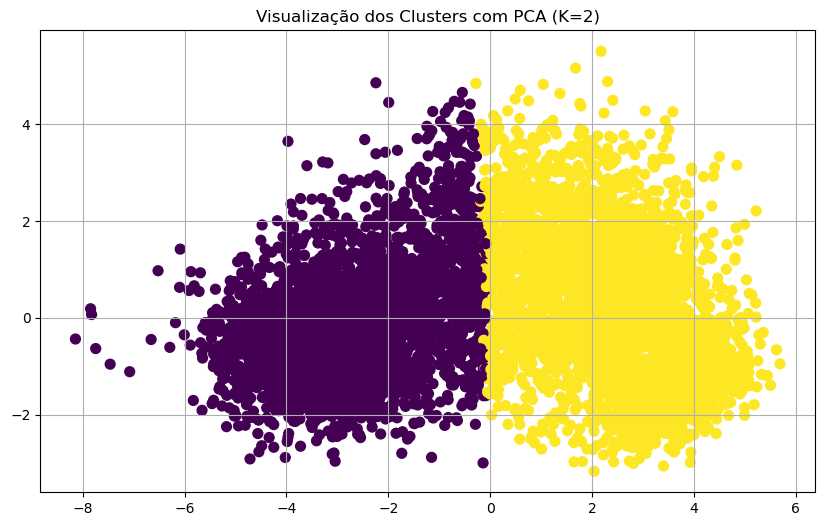

In [167]:
X = df_scaled

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Visualização dos Clusters com PCA (K=2)')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

A visualização com K=2 levanta a hipótese de que a estrutura inerente aos dados, após a redução de dimensionalidade pelo PCA, poderá ser considerada com três clusters em vez de dois.

#### 4.2.5 - K-MEANS - K=3

In [171]:
df_prod_k3 = df_scaled.copy()

model_k3 = KMeans(n_clusters=3, random_state=42).fit(df_prod_k3)

df_prod_k3['label'] = model_k3.labels_


In [173]:
df_prod_k3.groupby(['label']).mean().transpose()

label,0,1,2
Income,0.077816,1.046789,-0.923659
Recency,-0.023930,0.042356,-0.018694
MntMeat&Fish,0.495672,0.821998,-1.025086
MntEntries,-0.058658,0.791925,-0.617700
MntVegan&Vegetarian,0.225361,1.037919,-1.018068
MntDrinks,-0.042727,0.780149,-0.618903
MntDesserts,-0.025581,0.778424,-0.629297
MntAdditionalRequests,0.385291,0.601886,-0.766008
NumOfferPurchases,1.021614,-0.553666,-0.244589
NumAppPurchases,0.711346,0.443751,-0.859505


## **Cluster 0: Familiar e com Menor Gasto**
- **Income**: -0.88 (relativamente baixa)
- **Age e Recency**: Os mais jovens e tempo de associação médios (Age: -0.20, Membership_years: -0.17)
- **Dependents**: Muitos filhos +0.41
- **Total_spent**: --1.039305 - gastam pouco em todas as categorias
- **NumAppPurchases**: Poucas interações digitais (NumAppPurchases: -0.83, NumAppVisitsMonth: +0.44)
- **Martinal_status**: Mais propensos a serem casados ou juntos (Marital_Status_married: +0.41, together: +0.24)

### Perfil:
- Consumidores mais tradicionais, com menor salário, compram menos, pouco uso dos canais digitais, mas visitam o app (sem comprar muito). Podem ter filhos/dependentes e estar em relacionamentos estáveis.

---

## **Cluster 1: Intermediário, gastos Médios**
- **Income**: 0.1 (Média)
- **Age**: 0.14 Um pouco mais velho que a média
- **Dependents**: com alguns filhos
- **Total_spent**: Gastos moderados em todas as categorias
- **NumAppPurchases**: Usam bem o app para comprar (NumAppPurchases: +0.68
- **Recency**: Mais tempo de associação (Membership_years: +0.27)
- **NumOfferPurchases**: -0.42 (não dependem de descontos)
- **Martinal_Statusl**: Semelhante ao cluster 0, o que diferencia é ser um gripo mais jovem

### Perfil:
-  Consumidores equilibrados,usam o digital, moderadamente ativos em compras, com perfil mais jovem e educado. Dão resposta às promoções e representam um bom público para campanhas mistas.

---

## **Cluster 2: Alto consumo, maior salário - Premium**
- **Income**: Alta +1.08
- **Age**: semelhante ao cluster 1 - idade um pouco acima da média
- **Dependents**: Poucos dependentes  -0.79 
- **Total_spent**: Altíssimo gasto total e em todas as categorias (Total_spent: +1.05)
- **NumAppPurchases**: Altas compras em app, loja e take-away (TakeAway: +1.12, Store: +0.95, App: +0.52)
- **NumAppVisitsMonth** Poucas visitas ao app (AppVisitsMonth: -0.92), ou seja, quando visitam compram 
- **Martinal_status**: Leve tendência a serem casados ou juntos
- **Recency**: Levemente positiva, ultima compra foi recente
  
### Perfil:
- Clientes de alto valor. Compram muito, gastam em todas as categorias, usam o app de forma efetiva, têm bons salários e são provavelmente financeiramente estáveis. São ideais para estratégias de fidelização premium.

---

# Considerações
- **Cluster 0**: Potencial para crescimento com incentivos digitais e ofertas.
- **Cluster 1**: Público versátil, ideal para campanhas em todos os canais.
- **Cluster 2**:  Clientes VIP – foco em retenção e personalização.



##### Método PCA para k = 3

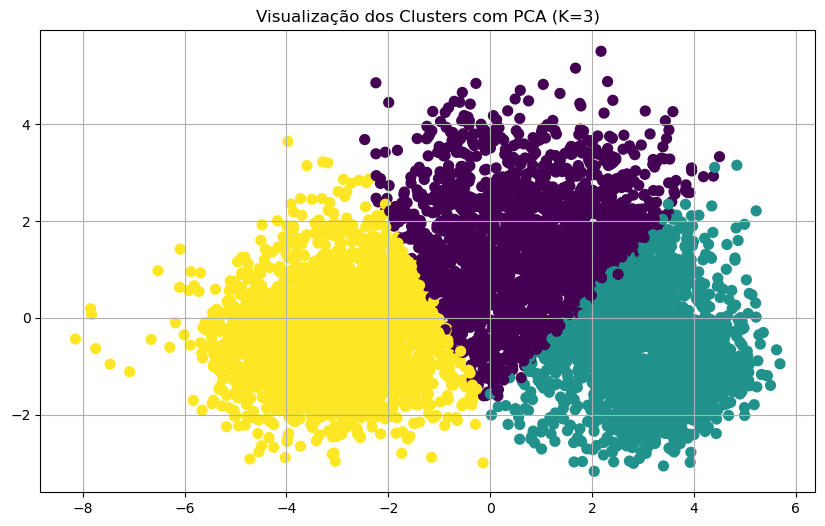

In [177]:
X = df_scaled

pca = PCA(n_components=3)
data_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Visualização dos Clusters com PCA (K=3)')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.show()

O clustering com K=3 revela três grupos distintos na visualização bidimensional das componentes principais. Já tinhamos confirmado o mesmo com k=2.

#### 4.2.6. euclidean_distance para K =3

In [181]:
from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(model_k3.cluster_centers_)
dists

array([[0.       , 3.4584265, 4.2383366],
       [3.4584265, 0.       , 6.265788 ],
       [4.2383366, 6.265788 , 0.       ]], dtype=float32)

✅ Cluster 0 e Cluster 1 são mais similares entre si (distância de 3.35).

✅ Cluster 2 está relativamente distante dos outros dois, sugerindo que é o grupo mais distinto em termos de características.

✅ Cluster 1 e 2 são os mais distintos (6.586)

### 4.3. Análise detalhada do cluster escolhido

---

Após análises anteriores decidimos que o k = 3 é o numero que melhor se enquadra no nosso plano de marketing

In [186]:
pd.set_option('display.max_columns', None)
df_prod_k3.groupby(['label']).mean()

,Income,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Age,Membership_years,Dependents,Total_spent,TotalPurchases,Education_graduation,Education_highschool,Education_master,Education_phd,Marital_Status_married,Marital_Status_single,Marital_Status_together,Marital_Status_widow
label,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.077816,-0.023930,0.495672,-0.058658,0.225361,-0.042727,-0.025581,0.385291,1.021614,0.711346,-0.089127,0.220140,0.418490,0.157421,0.298442,0.366851,0.366692,0.528010,0.489705,0.072899,0.181413,0.249304,0.424597,0.214802,0.225376,0.039510
1,1.046789,0.042356,0.821998,0.791925,1.037919,0.780149,0.778424,0.601886,-0.553666,0.443751,1.062020,0.872008,-0.928121,0.130474,-0.026047,-0.830279,1.005131,0.810227,0.523326,0.088222,0.163972,0.224480,0.389376,0.212009,0.262818,0.042494
2,-0.923659,-0.018694,-1.025086,-0.617700,-1.018068,-0.618903,-0.629297,-0.766008,-0.244589,-0.859505,-0.821156,-0.876579,0.482670,-0.217029,-0.184226,0.436976,-1.088313,-1.037610,0.495585,0.116699,0.148560,0.176583,0.414587,0.236852,0.242226,0.022265


In [188]:
df_prod_k3.groupby(['label']).describe()

Income                                                              \
        count      mean       std       min       25%       50%       75%   
label                                                                       
0      1797.0  0.077816  0.580254 -1.885733 -0.274994  0.114921  0.455535   
1      2165.0  1.046789  0.490644 -1.018582  0.724954  1.070251  1.412152   
2      2605.0 -0.923659  0.566504 -2.391085 -1.330243 -0.944252 -0.524890   

                Recency                                                    \
            max   count      mean       std       min       25%       50%   
label                                                                       
0      1.992110  1797.0 -0.023930  0.993275 -1.703471 -0.872295 -0.041120   
1      2.071122  2165.0  0.042356  1.002385 -1.703471 -0.837663  0.097409   
2      0.681293  2605.0 -0.018694  1.002092 -1.703471 -0.872295 -0.041120   

                          MntMeat&Fish                                \
            75%       max        count      mean       std       min   
label                                                                  
0      0.824688  1.725128       1797.0  0.495672  0.469126 -1.320085   
1      0.893953  1.725128       2165.0  0.821998  0.330984 -0.537717   
2      0.859320  1.725128       2605.0 -1.025086  0.704653 -3.620679   

                                              MntEntries                      \
            25%       50%       75%       max      count      mean       std   
label                                                                          
0      0.232170  0.525475  0.842542  1.412751     1797.0 -0.058658  0.949721   
1      0.620893  0.873785  1.069793  1.411352     2165.0  0.791925  0.609718   
2     -1.468543 -0.960448 -0.537717  0.609672     2605.0 -0.617700  0.827867   

                                                        MntVegan&Vegetarian  \
            min       25%       50%       75%       max               count   
label                                                                         
0     -1.885043 -0.219047  0.221730  0.600613  1.474322              1797.0   
1     -1.885043  0.617824  0.889789  1.143766  1.474322              2165.0   
2     -1.885043 -1.885043 -0.380059 -0.014693  1.266010              2605.0   

                                                                             \
           mean       std       min       25%       50%       75%       max   
label                                                                         
0      0.225361  0.438144 -1.240716 -0.066335  0.213432  0.516841  1.523275   
1      1.037919  0.421521 -0.449441  0.759588  1.095460  1.371254  1.734056   
2     -1.018068  0.523696 -4.201111 -1.322415 -0.992129 -0.648147  0.470776   

      MntDrinks                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
0        1797.0 -0.042727  0.942435 -1.869718 -0.214943  0.222865  0.616291   
1        2165.0  0.780149  0.623679 -1.869718  0.600938  0.894889  1.147732   
2        2605.0 -0.618903  0.834016 -1.869718 -1.869718 -0.374871 -0.011966   

                MntDesserts                                                   \
            max       count      mean       std      min       25%       50%   
label                                                                          
0      1.450507      1797.0 -0.025581  0.927338 -1.88184 -0.218234  0.221909   
1      1.467019      2165.0  0.778424  0.634758 -1.88184  0.600249  0.889009   
2      0.991277      2605.0 -0.629297  0.832777 -1.88184 -1.881840 -0.379016   

                          MntAdditionalRequests                                \
            75%       max                 count      mean       std       min   
label                                                                           
0      0.600249  1

In [190]:
df_prod_k3.columns

Index(['Income', 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth', 'Age',
       'Membership_years', 'Dependents', 'Total_spent', 'TotalPurchases',
       'Education_graduation', 'Education_highschool', 'Education_master',
       'Education_phd', 'Marital_Status_married', 'Marital_Status_single',
       'Marital_Status_together', 'Marital_Status_widow', 'label'],
      dtype='object')

#### 4.3.1 - Mapeamento

In [193]:
df_cluster = df.copy()

X = df_cluster[['Total_spent']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['label'] = kmeans.fit_predict(X)

cluster_mapping = {}
for cluster in df_cluster['label'].unique():
    avg_spent = df_cluster[df_cluster['label'] == cluster]['Total_spent'].mean()
    cluster_mapping[cluster] = avg_spent

sorted_clusters = sorted(cluster_mapping.items(), key=lambda x: x[1])
segment_labels = ['Baixo', 'Medio', 'Premium']  
final_cluster_mapping = {cluster: segment_labels[i] for i, (cluster, _) in enumerate(sorted_clusters)}

df_cluster['Segmento'] = df_cluster['label'].map(final_cluster_mapping)

Criaçao de DataFrames diferentes para cada cluster

In [196]:
Baixo = df_cluster[df_cluster['Segmento'] == 'Baixo']
Medio = df_cluster[df_cluster['Segmento'] == 'Medio']
Premium = df_cluster[df_cluster['Segmento'] == 'Premium']

In [198]:
tamanho_baixo = Baixo.shape[0]
tamanho_medio = Medio.shape[0]
tamanho_premium = Premium.shape[0]


print("Tamanho do cluster Baixo:", tamanho_baixo)
print("Tamanho do cluster Medio:", tamanho_medio)
print("Tamanho do cluster Premium:", tamanho_premium)


Tamanho do cluster Baixo: 3737
Tamanho do cluster Medio: 1685
Tamanho do cluster Premium: 1145


Tamanho de cada cluster. Podemos confirmar que o cluster 0 "Baixo" é o que tem maior numero, seguido do Medio e posteriormente o premium.

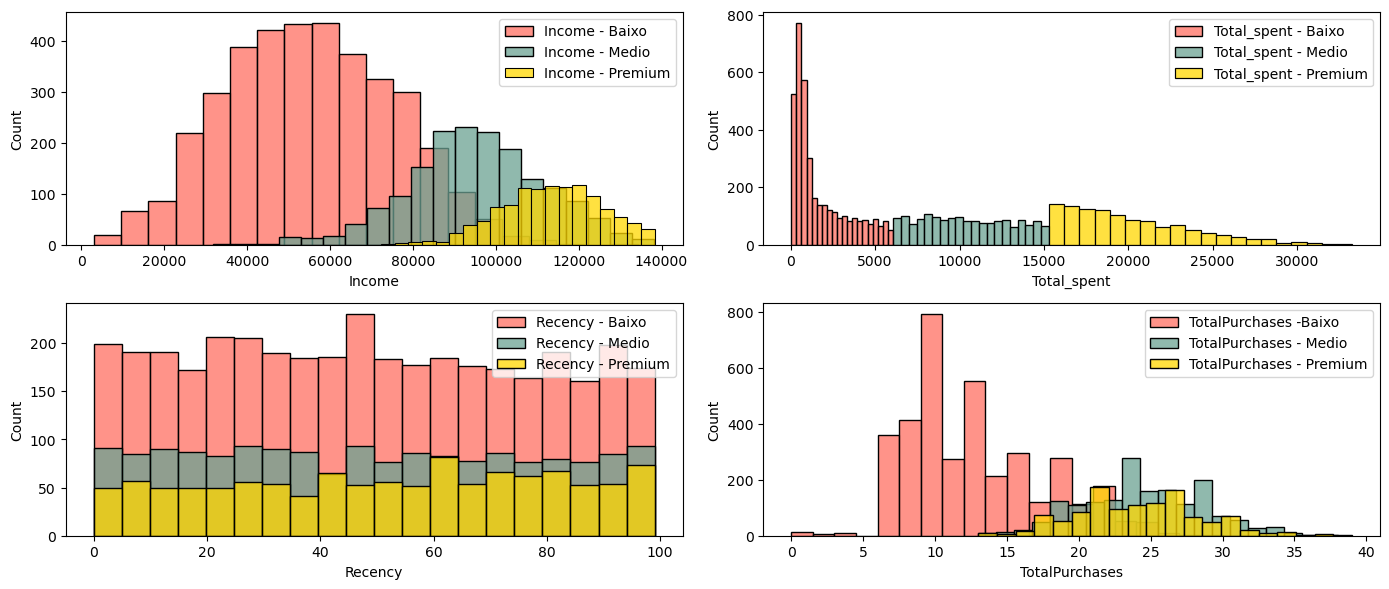

In [201]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 6))

# Income Distribution
sns.histplot(data=Baixo, x='Income', ax=ax1, color='#FF6F61', label='Income - Baixo', bins=20)
sns.histplot(data=Medio, x='Income', ax=ax1, color='#6BA292', label='Income - Medio', bins=20)
sns.histplot(data=Premium, x='Income', ax=ax1, color='#FFD700', label='Income - Premium', bins=20)
ax1.legend()

# Total_spent Distribution
sns.histplot(data=Baixo, x='Total_spent', ax=ax2, color='#FF6F61', label='Total_spent - Baixo', bins=20)
sns.histplot(data=Medio, x='Total_spent', ax=ax2, color='#6BA292', label='Total_spent - Medio', bins=20)
sns.histplot(data=Premium, x='Total_spent', ax=ax2, color='#FFD700', label='Total_spent - Premium', bins=20)
ax2.legend()

# Recency Distribution
sns.histplot(data=Baixo, x='Recency', ax=ax3, color='#FF6F61', label='Recency - Baixo', bins=20)
sns.histplot(data=Medio, x='Recency', ax=ax3, color='#6BA292', label='Recency - Medio', bins=20)
sns.histplot(data=Premium, x='Recency', ax=ax3, color='#FFD700', label='Recency - Premium', bins=20)
ax3.legend()

# Total_Purchases Distribution
sns.histplot(data=Baixo, x='TotalPurchases', ax=ax4, color='#FF6F61', label='TotalPurchases -Baixo', bins=20)
sns.histplot(data=Medio, x='TotalPurchases', ax=ax4, color='#6BA292', label='TotalPurchases - Medio', bins=20)
sns.histplot(data=Premium, x='TotalPurchases', ax=ax4, color='#FFD700', label='TotalPurchases - Premium', bins=20)
ax4.legend()

plt.tight_layout()
plt.show()

#### 4.3.2. Centroids Análises

In [204]:
centroids = model_k3.cluster_centers_
centroids

array([[ 0.07725844, -0.02369884,  0.4953319 , -0.05938781,  0.22507733,
        -0.04267717, -0.0263893 ,  0.38498408,  1.0223554 ,  0.7111343 ,
        -0.08954894,  0.21927844,  0.41960075,  0.15802494,  0.29844078,
         0.3676024 ,  0.3662319 ,  0.5275552 ,  0.4891486 ,  0.0728993 ,
         0.18196996,  0.24930435,  0.4245966 ,  0.21424595,  0.22537562,
         0.03951028],
       [ 1.0465395 ,  0.04292521,  0.8218231 ,  0.79198927,  1.0376884 ,
         0.7797422 ,  0.77843535,  0.60131395, -0.55346566,  0.44371516,
         1.0614333 ,  0.8720605 , -0.9279296 ,  0.13028458, -0.02600009,
        -0.8298463 ,  1.0048864 ,  0.81006694,  0.5235457 ,  0.08818102,
         0.16389658,  0.22437672,  0.3891967 ,  0.21237305,  0.2626962 ,
         0.04247459],
       [-0.923824  , -0.0193507 , -1.0254146 , -0.6177908 , -1.018471  ,
        -0.61913705, -0.62928843, -0.7658459 , -0.24514866, -0.85982746,
        -0.82109904, -0.87670213,  0.482289  , -0.21742213, -0.18432619,
       

Cada cluster tem um centroide marcado com um "X". O centroide representa o ponto médio dos dados dentro de cada cluster e pode ser interpretado como o cliente "típico" de cada segmento. Confirma as conclusões que já tinhamos retirado anteriormente.

In [207]:
df_encoded.columns

Index(['Income', 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth', 'Age',
       'Membership_years', 'Dependents', 'Total_spent', 'TotalPurchases',
       'Education_graduation', 'Education_highschool', 'Education_master',
       'Education_phd', 'Marital_Status_married', 'Marital_Status_single',
       'Marital_Status_together', 'Marital_Status_widow'],
      dtype='object')

In [209]:
centroid_0_TotalSpent = centroids[0][16]
centroid_1_TotalSpent = centroids[1][16]
centroid_2_TotalSpent = centroids[2][16]
centroid_0_Income = centroids[0][0]
centroid_1_Income = centroids[1][0]
centroid_2_Income = centroids[2][0]

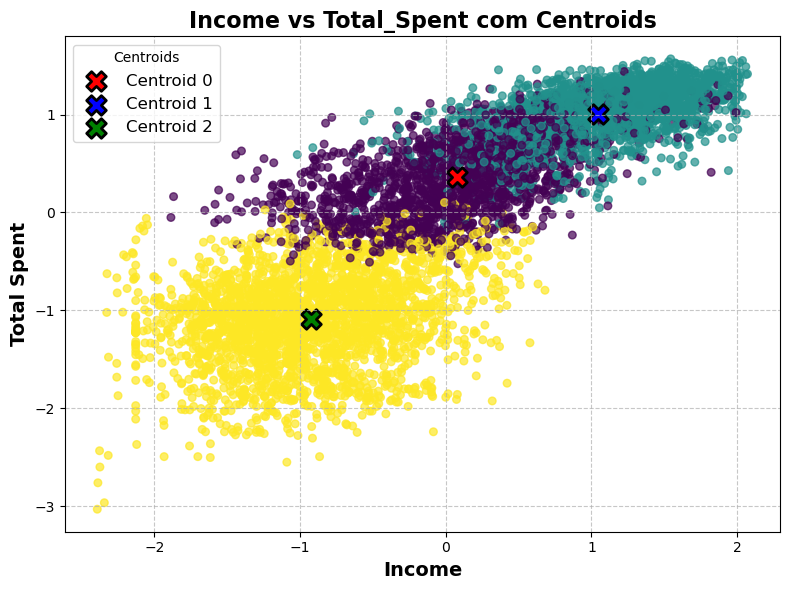

In [211]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_prod_k3.Income, df_prod_k3.Total_spent, c=df_prod_k3.label, s=30, cmap='viridis', alpha=0.7)

plt.scatter(centroid_0_Income, centroid_0_TotalSpent, marker='X', s=200, color='red', edgecolor='black', linewidth=2, label='Centroid 0')
plt.scatter(centroid_1_Income, centroid_1_TotalSpent, marker='X', s=200, color='blue', edgecolor='black', linewidth=2, label='Centroid 1')
plt.scatter(centroid_2_Income, centroid_2_TotalSpent, marker='X', s=200, color='green', edgecolor='black', linewidth=2, label='Centroid 2')

plt.xlabel('Income', fontsize=14, fontweight='bold')
plt.ylabel('Total Spent', fontsize=14, fontweight='bold')
plt.title('Income vs Total_Spent com Centroids', fontsize=16, fontweight='bold')
plt.legend(title='Centroids', loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

O gráfico confirma análises anteriores. Os clientes podem ser segmentados em três grupos principais com base no seu salário e no total_spent. O cluster com maior salãrio tende a a gastar mais, enquanto o cluster com menor salário tende a gastar menos. O cluster Médio situa-se entre os dois.



#### 4.3.3. Análise das variáveis demográficas

In [214]:
df_demog = df[['Age','Education','Marital_Status','Dependents']].copy()
demo_view = pd.concat([df_prod_k3, df_demog], axis=1)



In [216]:
Baixo = df_cluster[df_cluster['Segmento'] == 'Baixo']
Medio = df_cluster[df_cluster['Segmento'] == 'Medio']
Premium = df_cluster[df_cluster['Segmento'] == 'Premium']


__`Baixo`__

In [219]:
display(Baixo.describe(include=['O']))

print('\nEducation level - Essencialista')
display(round(Baixo['Education'].value_counts() / len(Baixo) * 100, 2))

print('\nMédia Dependents - ')
display(Baixo['Dependents'].mean())

,Name,Education,Marital_Status,Segmento
count,3737,3737,3737,3737
unique,3522,5,5,1
top,Mr. Keith Oliver,graduation,married,Baixo
freq,3,1867,1580,3737



Education level - Essencialista


Education
graduation    49.96
phd           19.29
master        15.71
highschool    10.44
basic          4.60
Name: count, dtype: float64


Média Dependents - 


1.2362857907412363

__`Medio`__

In [222]:
display(Medio.describe(include=['O']))

print('\nEducation level - Medio')
display(round(Medio['Education'].value_counts() / len(Medio) * 100, 2))

print('\nMédia Dependents -')
display(Medio['Dependents'].mean())

,Name,Education,Marital_Status,Segmento
count,1685,1685,1685,1685
unique,1630,5,5,1
top,Mr. Boris Harris,graduation,married,Medio
freq,3,844,659,1685



Education level - Medio


Education
graduation    50.09
phd           23.26
master        16.97
highschool     9.50
basic          0.18
Name: count, dtype: float64


Média Dependents -


0.7026706231454006

__`Premium`__

In [225]:
display(Premium.describe(include=['O']))

print('\nEducation level - Premium')
display(round(Premium['Education'].value_counts() / len(Premium) * 100, 2))

print('\nMédia Dependents ')
print(Premium['Dependents'].mean())


,Name,Education,Marital_Status,Segmento
count,1145,1145,1145,1145
unique,1128,4,5,1
top,Mr. Luke Lambert,graduation,married,Premium
freq,2,593,447,1145



Education level - Premium


Education
graduation    51.79
phd           24.54
master        17.03
highschool     6.64
Name: count, dtype: float64


Média Dependents 
0.22969432314410482


<div style="background-color:#a8f0d7; padding: 10px; border-radius: 20px; text-align: center;">
  <strong>5. Plano de Marketing</strong>
</div>

### 5.1. Exploração variaveis não analisadas anteriormente

---

### __`Mnt - Diferentes categorias`__

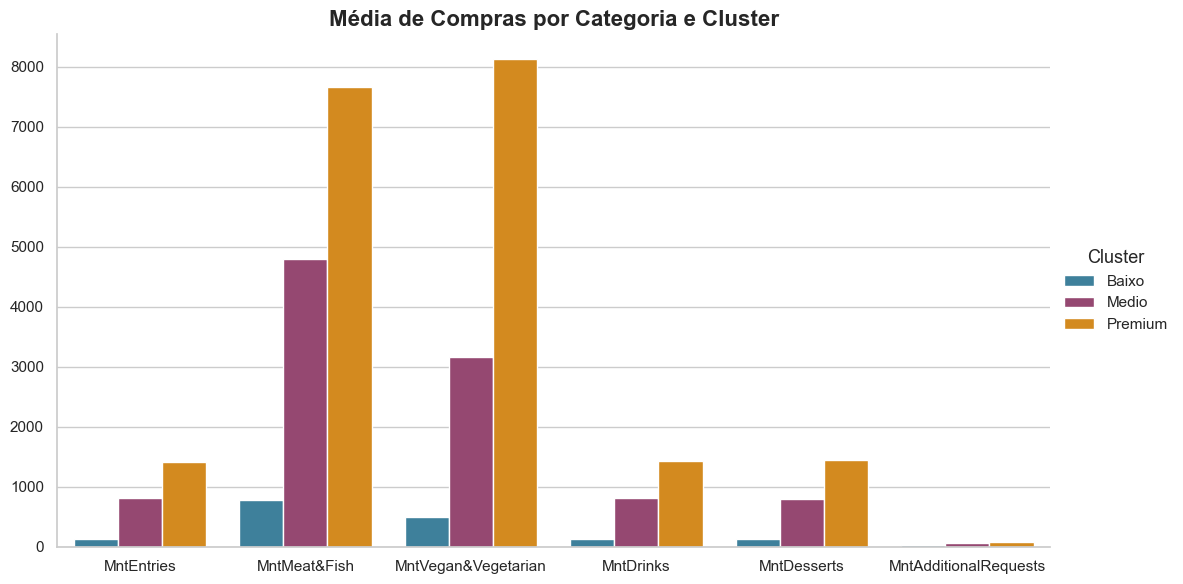

In [272]:
sns.set_theme(style="whitegrid")


Baixo = Baixo.copy()
Baixo['Cluster'] = 'Baixo'
Medio = Medio.copy()
Medio['Cluster'] = 'Medio'
Premium = Premium.copy()
Premium['Cluster'] = 'Premium'


df = pd.concat([Baixo, Medio, Premium])

# Colunas 
cols = ['MntEntries', 'MntMeat&Fish', 'MntVegan&Vegetarian', 
            'MntDrinks', 'MntDesserts', 'MntAdditionalRequests']

# Média por cluster
summary = df.groupby('Cluster')[cols].mean().reset_index()


summary_melted = summary.melt(id_vars='Cluster', var_name='Categoria', value_name='Total Comprado')

# Paleta de cores 
palette = {
    'Baixo': '#2E86AB',    
    'Medio': '#A23B72',    
    'Premium': '#F18F01'   
}

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=summary_melted, x='Categoria', y='Total Comprado', hue='Cluster', palette=palette)
plt.title('Média de Compras por Categoria e Cluster', fontsize=16, weight='bold')
plt.xlabel('')  
plt.ylabel('')  
plt.xticks(rotation=0, fontsize=11) 
plt.yticks(fontsize=11)
plt.legend(title='Cluster', title_fontsize=13, fontsize=11, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

plt.tight_layout()
plt.show()

### 🟠 Cluster Premium
- **Maior média de consumo** em todas as categorias.
- Destaques: `MntMeat&Fish` e `MntVegan&Vegetarian`
- Também consome significativamente: Entradas, bebidas e sobremesas 

### 🟣 Cluster Médio
- **Consumo moderado e equilibrado**.
- Destaques: `MntMeat&Fish` e `MntVegan&Vegetarian` também

### 🔵 Cluster Baixo
**Menor consumo médio** em todas as categorias.
- Valores residuais, com destaque modesto para: `MntMeat&Fish` e `MntVegan&Vegetarian`
---

### Destaques Gerais
- `MntMeat&Fish` e `MntVegan&Vegetarian` são as categorias mais relevantes em termos de volume de compras.
- `MntAdditionalRequests` apresenta valores baixos em todos os clusters

### __`Membership_Years`__

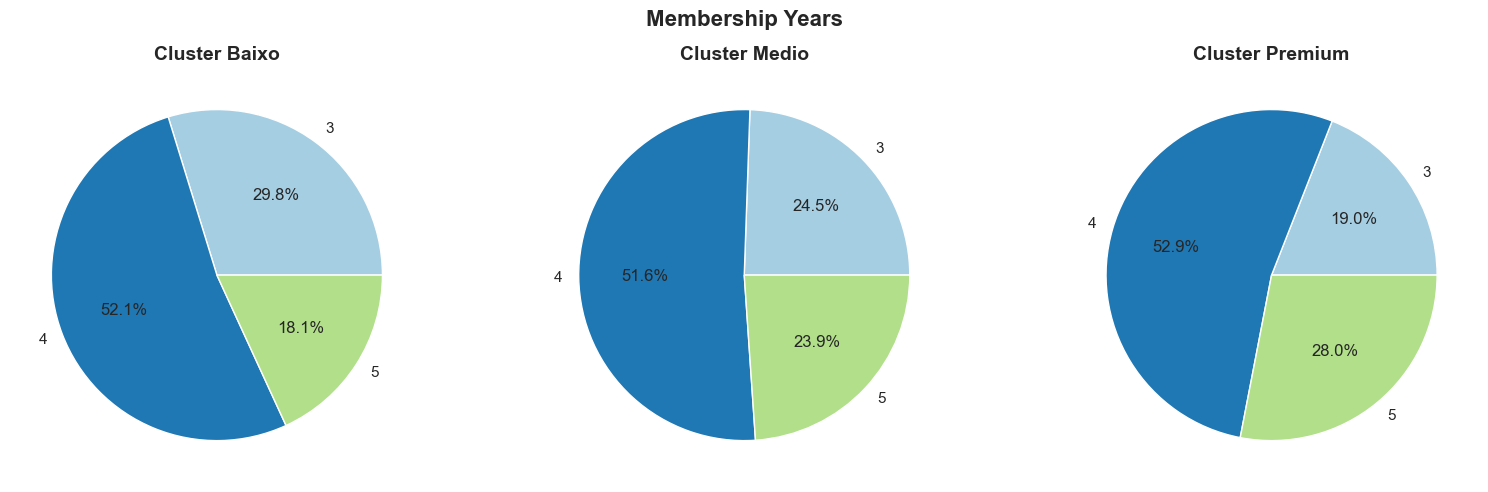

In [286]:
clusters = df['Cluster'].unique()


colors = plt.cm.Paired.colors  

fig, axes = plt.subplots(1, len(clusters), figsize=(16, 5))

for i, cluster in enumerate(clusters):
    data = df[df['Cluster'] == cluster]['Membership_years'].value_counts().sort_index()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'Cluster {cluster}', fontsize=14, weight='bold')

plt.suptitle('Membership Years', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

## Destaques Gerais

Nesta análise devemos ter em atenção dados verificados anteriormente:

__*Tamanho:*__
Cluster Baixo: 3.737 membros (57% do total)
Cluster Médio: 1.685 membros (26% do total)
Cluster Premium: 1.145 membros (17% do total)

__*Médias Escaladas:*__
Cluster Baixo: 0.36
Cluster Médio: -0.83
Cluster Premium: 0.43

__*Conclusões*__

__`Cluster Baixo:`__ Uma parcela significativa (52.1%) dos membros está há 4 anos, seguido por 3 anos (29.8%) e depois 5 anos (18.1%). Isso sugere um grupo relativamente estabelecido, mas potencialmente menos leal em termos de tempo de adesão em comparação com outros.

__`Cluster Médio:`__ Similar ao "Cluster Baixo", a maior parte também está há 4 anos (51.6%). No entanto, a distribuição é um pouco mais equilibrada com 3 anos (24.5%) e 5 anos (23.9%). Isso pode indicar um nível de fidelidade mais consistente ao longo do tempo.

__`Cluster Premium:`__ Este cluster demonstra uma maior concentração de membros de longo prazo, com 52.9% há 4 anos e uma parcela considerável de 28.0% há 5 anos. Apenas 19.0% estão há 3 anos. Isso aponta fortemente para uma base de clientes mais leal e estabelecida dentro do segmento premium.

### 5.2. Estratégia de Marketing por segmento

---

| **Cluster** | **Objetivos de Marketing**                                                                                     | **Estratégias**                                                                                                   | **Táticas**                                                                                  |
|-------------|-----------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Cluster 0 - Familiar e com Menor Gasto** | **Aumentar as compras. Fidelizar estes clientes.**                                                                | - Criação de Menu Família. <br> - Incentivar o uso do digital através de promoções. <br> - Oferecer descontos em categorias específicas. | - Enviar cupons digitais para compras na app. <br> - Incentivar interações através de notificações personalizadas. <br> - Oferecer bônus nas compras via app, uma vez que este grupo usa muito mas compra pouco no digital. |
| **Cluster 1 - Intermediário, Gastos Médios** | **Aumentar a frequência de compras e converter para cliente Premium (Cluster 2).**                                                       | - Criar campanhas promocionais com um equilíbrio entre descontos e novas ofertas. <br> - Incentivar mais interações digitais. | - Oferecer descontos para compras na app. <br> - Lançar campanhas de email marketing com ofertas personalizadas. <br> - Oferecer recompensas por interações. |
| **Cluster 2 - Premium - Alto Consumo** | **Reforçar a fidelização e personalização das ofertas.**                                                          | - Oferecer benefícios exclusivos e produtos únicos. <br> - Criar eventos anuais exclusivos para este grupo.                           | - Lançar uma campanha de fidelidade com benefícios exclusivos. <br> - Oferecer ofertas personalizadas baseadas no histórico de compras. <br> - Realizar um atendimento personalizado. |


### __`Técnicas longo prazo`__

- Atualizar os clusters a cada 6 meses com novos dados.
- Questionários por email com perguntas direcionadas a cada perfil.

<div style="background-color:#a8f0d7; padding: 10px; border-radius: 20px; text-align: center;">
  <strong>6. Conclusões</strong>
</div>

Ao aplicar o modelo K-Means nesta base de dados conseguimos indentificar três grupos distintos dentro dos dados. Os dados foram agrupados com base na sua similaridade, revelando padrões e estruturas que não eram óbvios na análise inicial dos datasets. 
Após a identificação dos clusters analisamos caracteristicas dos pontos de dados dentro de cada grupo, calculando os centróides de cada cluster e examinando as variáveis que contribuem para a sua posição, com isso, foi possivel identificar os grupos de clientes com maior valor para a empresa e de que forma poderiamos montar estratégias para cada grupo distinto. 

__*Melhorias*__

Após a implementação do modelo de k-means, identificamos um grupo de variáveis que demonstraram ter pouca influência na separação dos dados em clusters. Essa lista inclui: __['Recency', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumTakeAwayPurchases', 'NumStorePurchases', 'Age', 'Membership_years', 'Education_graduation', 'Education_highschool', 'Education_master', 'Education_phd'].__ Recomendamos explorar a possibilidade de treinar o modelo novamente, excluindo essas variáveis, a fim de avaliar se isso resulta numa melhor definição dos clusters.